# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Importing necessary libraries and data

In [1]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd  

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [3]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [4]:
#View the 1st 5 rows of dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
#Check data type and not null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [6]:
data.shape

(25480, 12)

## Observations

- There are 25480 rows and 12 columns in the data set

- There are no missing values in the data set. This can be verified by isna() method

- Number of employees, years of establishment & prevailing wages are of type integer or float. All other attributes are of object type and will need to be converted to the right datatype

In [7]:
data.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [8]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [9]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


## Observations

- As there were no missing values in the dataset, all necessary datatypes of object type has been converted to category, thereby reducing the memory usage from 2.3+MB to 2 MB

## Summary of the dataset

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Observations

- The average number of employees in the employer's organization are 5667 while the median number of employees in the employer's organization are 2109. This implies the attribute has a right skewed distribution with several positive outliers. The minimum number is negative which does not appear to be a valid data point, this needs to be checked.

- There are companies in the dataset with years of establishment from 1800 to 2016

- The average prevailing wage for occupation is united states is USD 74,455 while the median is USD 70,308. This indicates, slight right skewness in the data set. The minimum value of USD 2.1367 does not appear to be a valid data point. This attribute needs to be checked further combining with unit_of_wage to gather further insight

In [12]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


## Observations

- The case ID attribute can be dropped as it is a unique ID variable and is not expected to add any value to the status of a visa being accepted
- There are 6 continents in the database, with majority of applicants from Asia
- There are 4 different levels of eduction with Bachelor's being the highest education degree for majority of applicants
- There are 5 different regions in the US requiring immigrants due to Human Resource shortages, the maximum being in the NorthEast US region
- There are 4 different units of wages with yearly being the most common. The prevailing wage and unit of wage may need to be studied in union to gather further insight
- Majority of the occupation with employee shortages are full time positions
- Case status is the attribute of interest and it will be used as a dependent variable

In [13]:
data.drop(['case_id'],axis=1,inplace=True)
data[data.duplicated()].count()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Observations

- There are no duplicate data entries in the dataset that will need further cleaning

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [16]:
#Observations on number_of_employees

#Removing negative entries for no_of_employees
data.drop(data[(data["no_of_employees"]<=0)].index, inplace=True)
data.shape

(25447, 11)

## Observations

- Removal of negative entries for the no_of_employees removed 33 entries from the dataset
- Negative values cannot to be inputed for no_of_employees, hence the above process was done

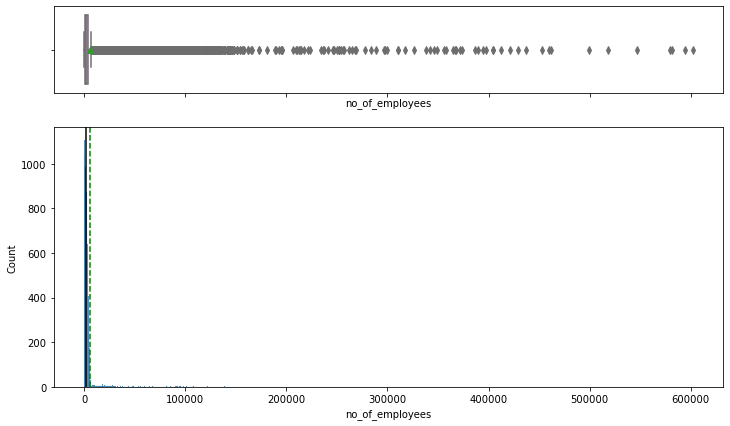

In [17]:
## Number of employees
histogram_boxplot(data, "no_of_employees")

## Observation

- The distribution for the no_of_employees is heavily right skewed
- There are many outliers in this distribution

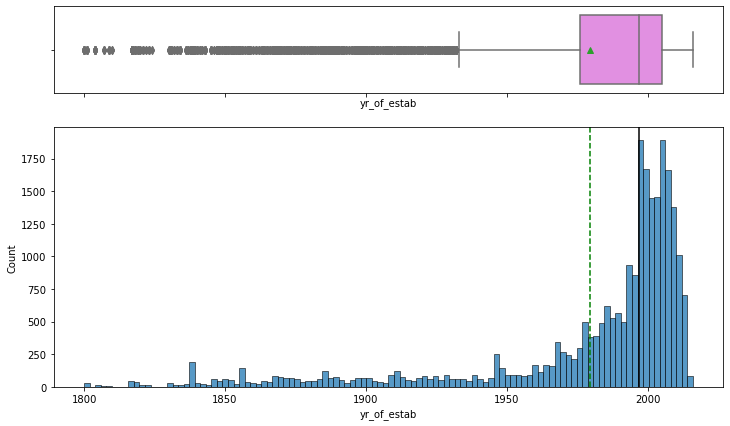

In [18]:
## year_of_establishment
histogram_boxplot(data, "yr_of_estab")

## Observations

- The distribution of the yr_of_estab is left skewed
- The median of this distribution is 1997
- The average for the yr_of_estab is 1979
- The max year of establishment is 2016

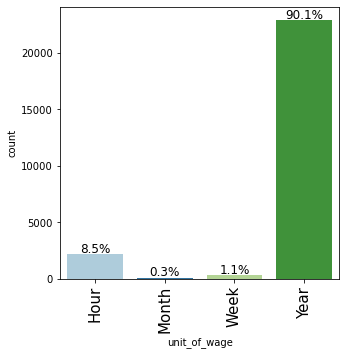

In [19]:
## prevailing_wage and unit_of_wage
labeled_barplot(data, "unit_of_wage", perc=True);

## Observation

- There are very less entries on monthly and weekly basis which has to be looked into further
- 90% of all entries are with unit_of_wage as yearly
- 8.5% entries are with unit_of_wage as hourly

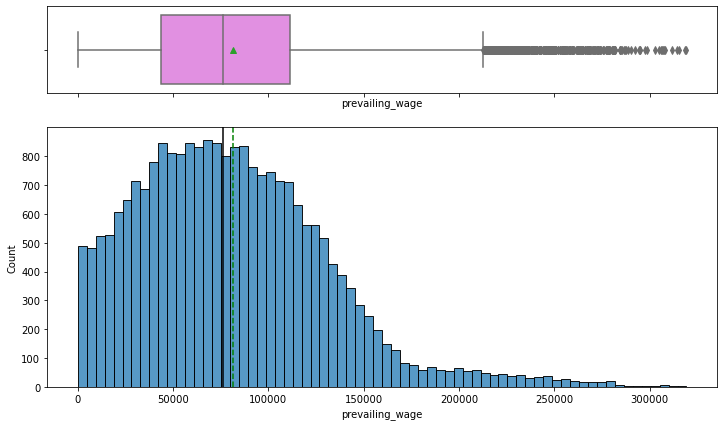

In [20]:
## Observations specifically on data where unit_of_wage is yearly
histogram_boxplot(data[(data["unit_of_wage"]=="Year")], "prevailing_wage")

## Observations

- The average and median annual salary is approx. USD 70,000 which seems accurate
- The trend appears correct with outliers in the higher income bracket between USD 200,000 to USD 300,000
- There are several very low salaries as well, which might be incorrect and requires further investigation


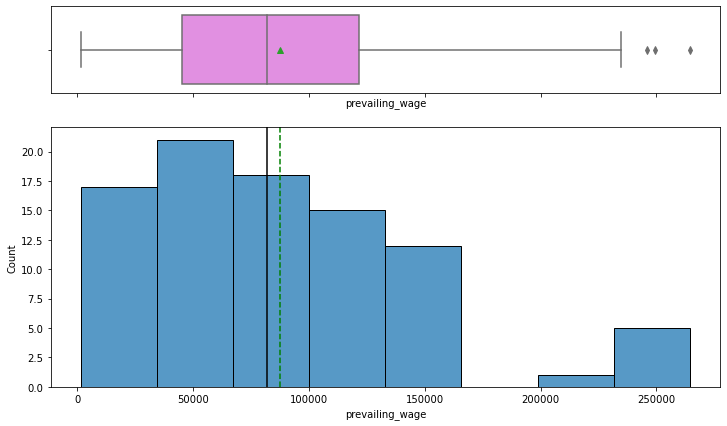

In [21]:
#Observations specifically on data where unit_of_wage is weekly or monthly
histogram_boxplot(data[(data["unit_of_wage"]=="Month")], "prevailing_wage")

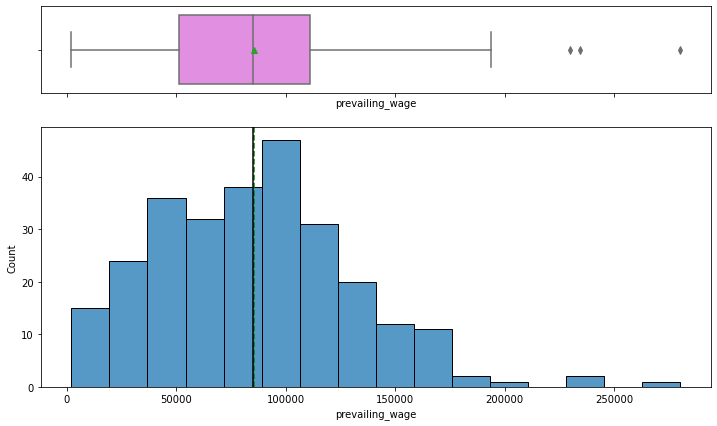

In [22]:
histogram_boxplot(data[(data["unit_of_wage"]=="Week")], "prevailing_wage")

## Observation
- With the plot above, it can be infered that prevailing_wages is likely already a yearly salary where unit_of_wage is either weekly or monthly

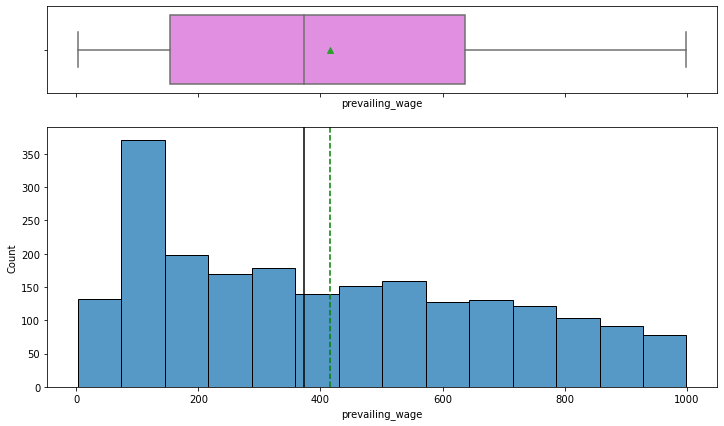

In [23]:
#Observations specifically on data where unit_of_wage is hourly 
histogram_boxplot(data[data["unit_of_wage"]=="Hour"], "prevailing_wage")

## Observations
- Based on the data we see above, we can infer that the prevailing_wage is likely a weekly salary where unit_of_wage is hourly. - We make this assumption as a median rate of pay of USD 400 per hour appears incorrect
- The dataset is not clean and needs to be cleaned well to find the right inferences
- "prevailing_wages" will be cleaned up to contain only wages on an annual basis, so it is uniform and can be used for model building
- "unit_wages" is assumed to be Not-Hourly, when the employee is paid a fixed salary irrespective of the number of hours worked. We will consider any unit_of_wages inherently as weekly, monthly or yearly as Not-Hourly
- For Hourly, when the employee is paid depending on the number of hours worked, We will consider any unit_of_wages inherently as hourly as hourly

In [24]:
# assuming 52 paid weeks per year
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"] = \
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"]*52
data["unit_of_wage"] = data["unit_of_wage"].astype('object')
data.loc[data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
data.loc[data["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
data["unit_of_wage"] = data["unit_of_wage"].astype('category')

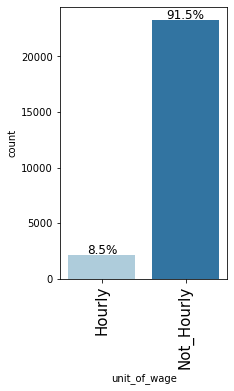

In [25]:
labeled_barplot(data, "unit_of_wage", perc=True)

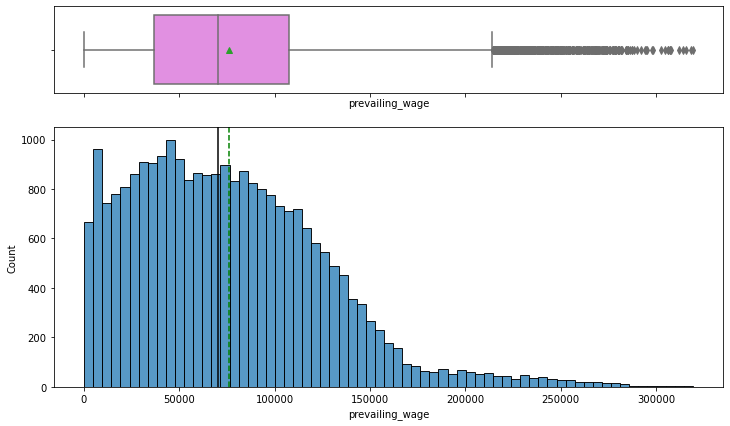

In [26]:
histogram_boxplot(data, "prevailing_wage")

## Observations
- There are still several lower and upper end outlier in annual_prevailing_wages which requires further investigation
- The distribution is heavily right skewed

## Leading Question
## 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

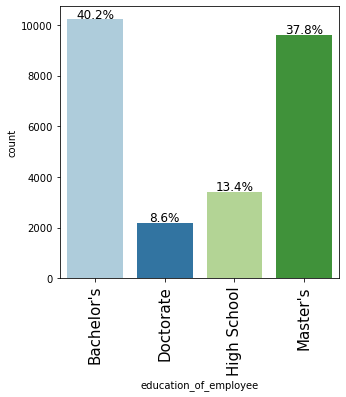

In [27]:
## Observations on education
labeled_barplot(data, "education_of_employee", perc=True)

## Observations
- Higher education doesnt necessarily pay a role in visa certification because 40.2% of employees have bachelor's degree while 37.8% of the employees have master's degree while only 8.6% of the employees have doctarate degree.
- Definetely just an high school diploma will not get a well paid job, as only 13.4% of the employees have high school degree

## Leading Question
## 2. How does the visa status vary across different continents?

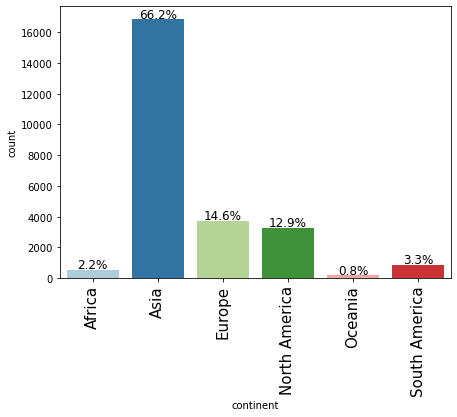

In [28]:
#Observations on continent
labeled_barplot(data, "continent", perc=True)

## Observations
- Majority of the employees are from Asia being at 66.2%
- The least number of employees are from Oceania
- 14.6% of employees are from Europe and 12.9% are from North America
- 3.3% of employees are from South America and 2.2% are from Africa

## Leading Question
## 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

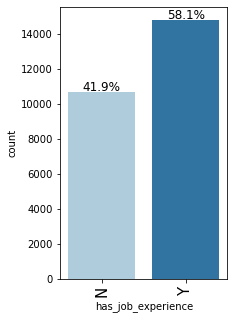

In [29]:
## Observations on job_experience
labeled_barplot(data, "has_job_experience", perc=True)

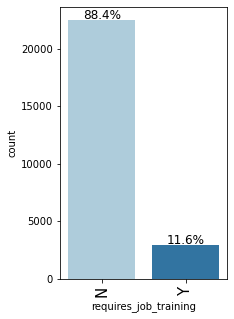

In [30]:
## Observations on requires_training
labeled_barplot(data, "requires_job_training", perc=True)

## Observation
- Yes work experience does influence visa status
- 58.1% of employees have prior experience and 41.9% dont have job experience
- Although in the second plot shown above majoritydo not require job training (88%), we observed that only 58% had prior job experience. It is possible that some occupations require employees with no prior job experience


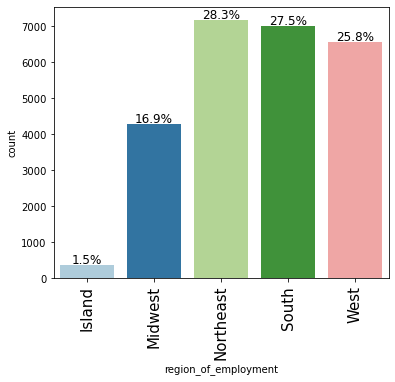

In [31]:
## Observations on region_of_employment 
labeled_barplot(data, "region_of_employment", perc=True)

## Observations
- Northeast, South and West equally have employment opportunities with Human Resource shortages with 25-28% employees applying for visa approval to these regions, followed by Midwest (18%) and Island (1.5%)

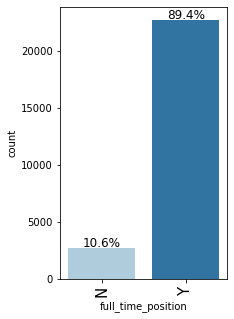

In [32]:
## Observations on full_time_position
labeled_barplot(data, "full_time_position", perc=True)

## Observations
- 89% of the employees are full time employees

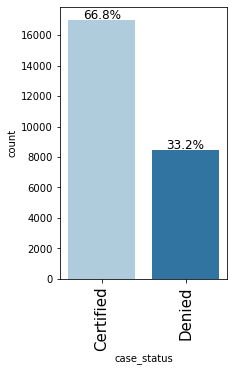

In [33]:
## Observations on case_status
labeled_barplot(data, "case_status", perc=True)

## Observations

- Approximately, 67% cases are approved and 33% cases are denied

## Bivariate Analysis

## To get a clear picture in the bivariate analysis, before we plot them we are going to do some data processing too

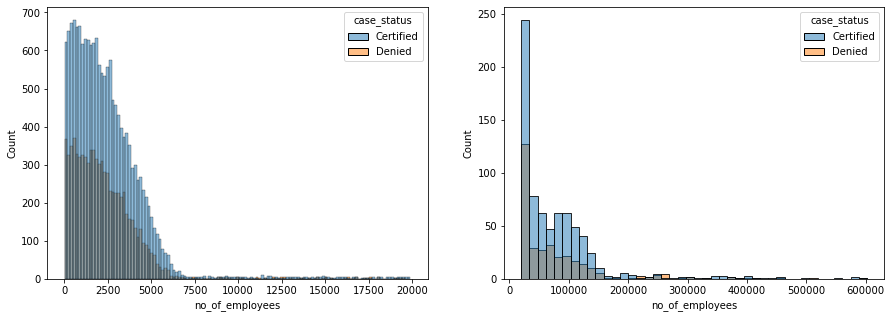

In [34]:
#number of employees and case status
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data[data["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=data[data["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

## Observations
- Greater than twice the number of cases are certified than denied both for employers having lesser as well as more number of employees.
- There are large number of outliers which requires outlier treatment to be made 
- The ML model is based on decision trees, which optimizes & splits the data by default, we can choose to bin the continuous datapoints into 3 practically chosen bins to decrease the model building time. This is because from the EDA, we see no spcific relationship between cases being certified and no_of_employees in an organization.

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [36]:
data["no_of_employees"] = pd.cut( data["no_of_employees"], \
                                  [0, 2500, 7500, np.inf], \
                                  labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>75000employees)"])
data["no_of_employees"] = data["no_of_employees"].astype("category")

case_status                       Certified  Denied    All
no_of_employees                                           
All                                   17001    8446  25447
Small_Sized(<2500employees)            9674    5084  14758
Medium_Sized(2500-7500employees)       6272    2874   9146
Large_Sized(>75000employees)           1055     488   1543
------------------------------------------------------------------------------------------------------------------------


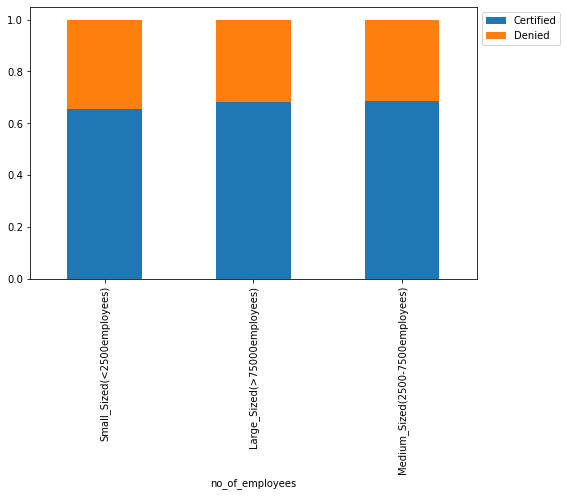

In [37]:
stacked_barplot(data, "no_of_employees", "case_status")

## Observations
- More than 65% of cases in all categories are certified after binning
- 58% are small sized companies which is less than 2500 employees
- 36% are medium sized companies
- 6% are large sized companies consisting of more than 7500 employees

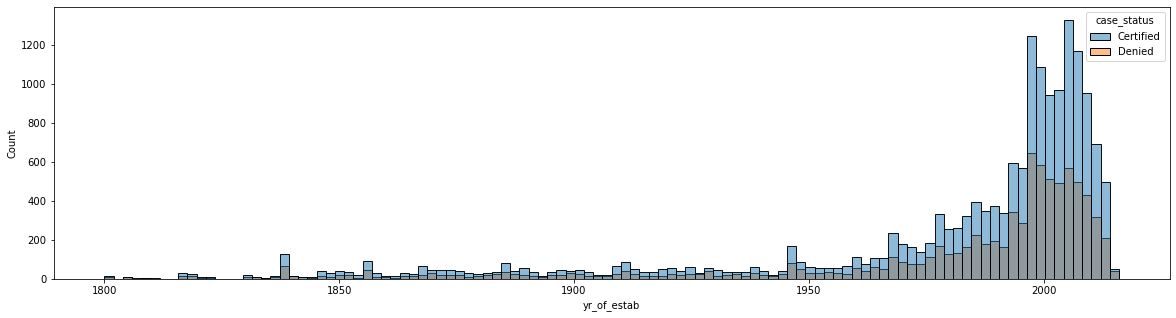

In [38]:
#year of establishment and case_status
plt.figure(figsize=(20,5))
sns.histplot(data, x="yr_of_estab", hue="case_status");

## Observations
- Similiar to the plot and observation before, more than 50% of all cases are certified than denied for employers irrespective of the employer's year of establishment
- There are large number of outliers in the lower end which has to be binned

In [39]:
data["yr_of_estab"] = pd.cut( data["yr_of_estab"], \
                                  [-np.inf, 1990, np.inf], \
                                  labels = ["Older_Estab(1800-1990)", \
                                            "Newer_Estab(>1990)"])
data["yr_of_estab"] = data["yr_of_estab"].astype("category")

case_status             Certified  Denied    All
yr_of_estab                                     
All                         17001    8446  25447
Newer_Estab(>1990)          10427    5083  15510
Older_Estab(1800-1990)       6574    3363   9937
------------------------------------------------------------------------------------------------------------------------


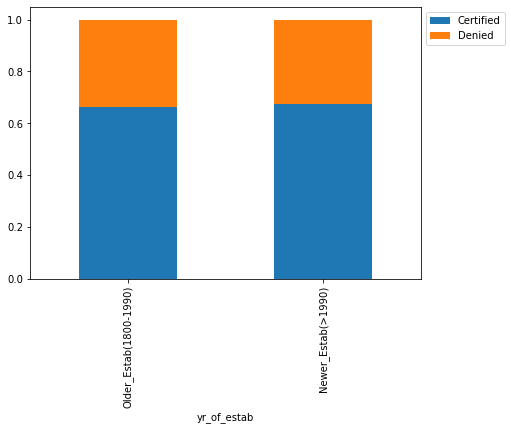

In [40]:
stacked_barplot(data, "yr_of_estab", "case_status")

## Observation
- Again like the previous plot, more than 65% of the cases in both the categories are approved
- Around 61% of employers were established after 1990 and 39% of employers before 1990

## Leading Question
## 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Not_Hourly        16254    7040  23294
Hourly              747    1406   2153
------------------------------------------------------------------------------------------------------------------------


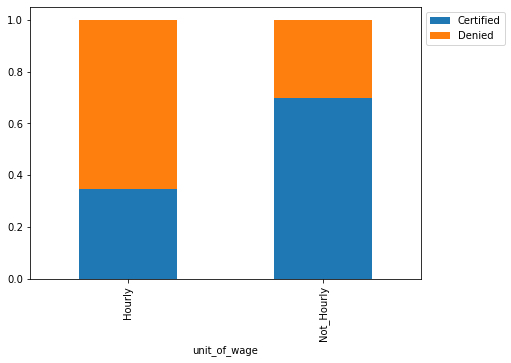

In [41]:
stacked_barplot(data, "unit_of_wage", "case_status")


## Observations
- Since unit_of_wage is converted as hourly and not hourly as two classes, Not hourly includes mothly,weekly and yearly
- 70% of cases are certified when the unit_of_wage is not hourly, and only 35% cases are certified when the unit_of_wage is hourly

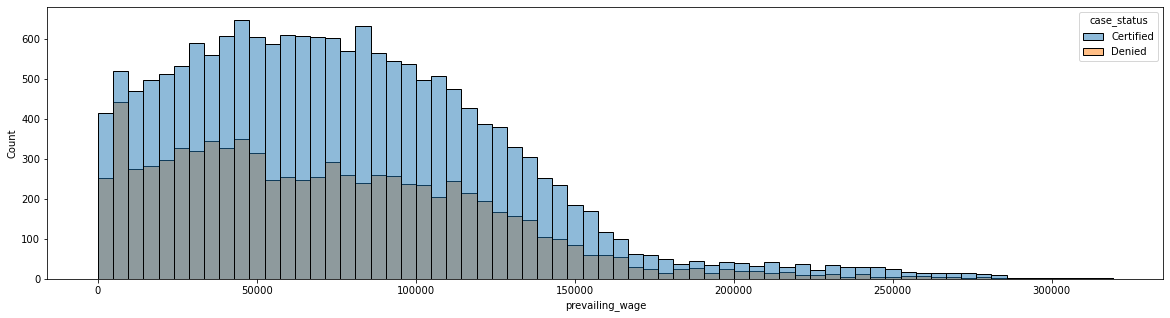

In [42]:
#prevailing_wage and case_status
plt.figure(figsize=(20,5))
sns.histplot(data, x="prevailing_wage", hue="case_status");

## Observations
- There are some outliers on the lower end of USD 14,500 or lesser, which are worrying. These may reference either positions that are unskilled cos of lower education level or where tips received make up portion of the compensation. Similarly, there are outliers on the higher end (USD 200,000 or more annually) which reference highly skilled positions 
- We see there is a general trend that ~ twice the cases are certified more than denied
- % certifications in comparison to % denied drops slightly on the lower end of the prevailing_wage and increases slightly on the upper end of the prevailing_wage
- The number of outliers are not as high as in the previous two instances (no_of_employees & yr_of_estab), as decision trees are immune to outliers, this does not need to be treated further. 

## Leading question
## 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [43]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

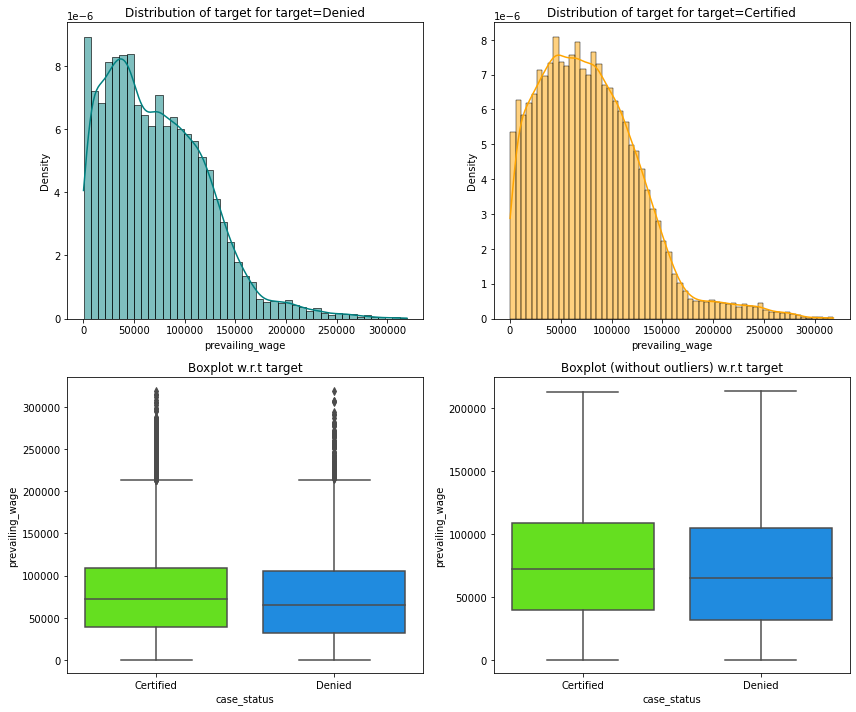

In [44]:
## Complete the code to find distribution of prevailing wage and case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

## Observations
- Yes , the U.S government does give a higher prevailing wage to promote local talent and foreign workers
- The mean prevailing wage is slightly higher (~ 80000) for employees whose case status is certified compared to the wage for the employees whose case status is not approved (~ 70000)
- Research shows that prevailing wage laws boost worker productivity, reduce injury rates, and increase apprenticeship training, which helps to address the shortage of skilled labor in construction

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


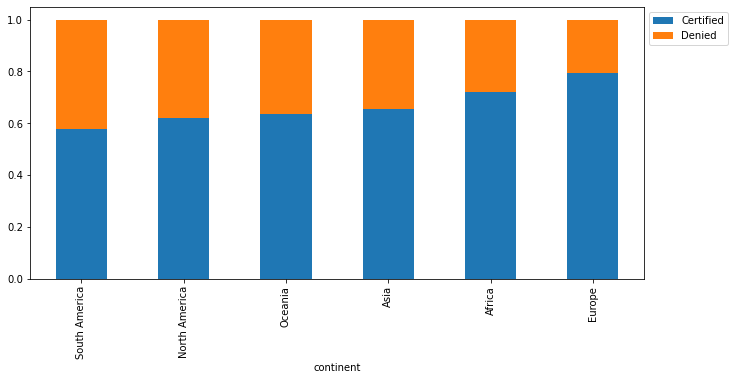

In [45]:
#continent and case status
stacked_barplot(data, "continent", "case_status")

## Observations
- Irrespective of where the employees are from, more cases are certified than denied
- With respect to the percent of certification based on continents, Europe is having the highest percentage followed by Africa, Asia, Oceania, North America and lastly by South America

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


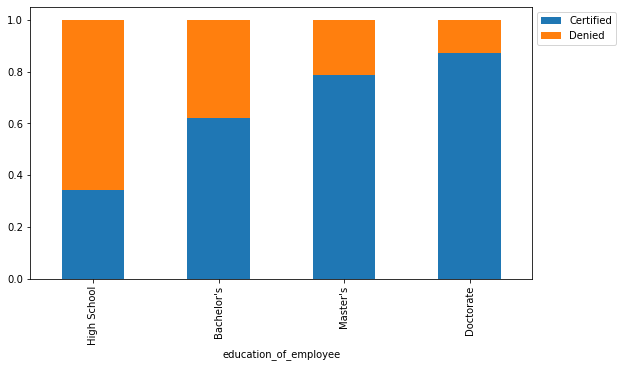

In [46]:
#education and case status
stacked_barplot(data, "education_of_employee", "case_status")

## Observations
- As expected the, the trend observed w.r.t % visa certification for education of employees is Doctorate > Master's > Bachelor's > High School

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


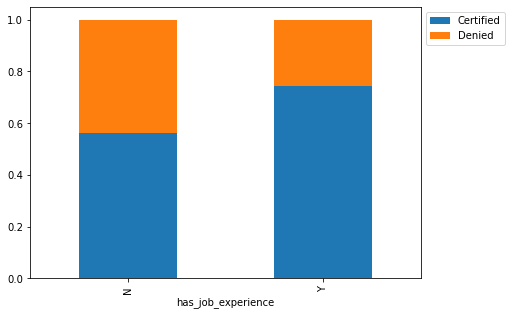

In [47]:
#job_experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

## Observation
- There are more number of visa certifications for employees who have prior job experience

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


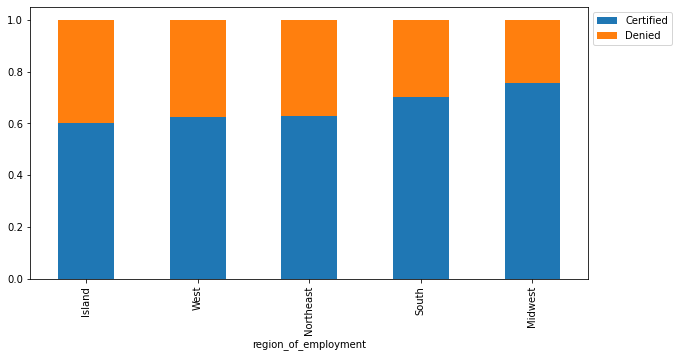

In [48]:
#region_of_employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

## Observation
- Midwest has the highest percentage of visa certifications followed by South, Northeast and West being at equal percentage and lastly by Island

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


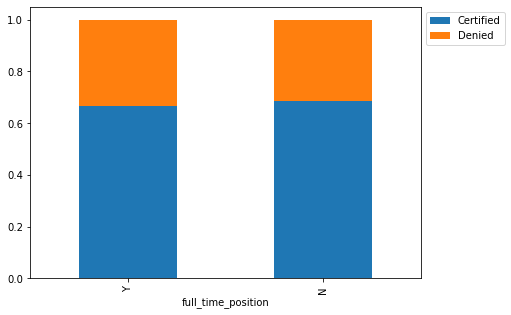

In [49]:
#full_time_position and case status
stacked_barplot(data, "full_time_position", "case_status")

## Observation
- The trend observed with respect to visa certification for full time job positions is same for both yes and no

## Outlier Check

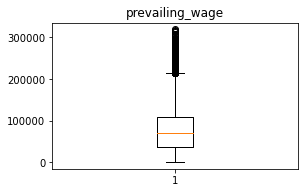

In [50]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
        ## Complete the code to create boxplots for all the numeric columns
    plt.subplot(5, 4, i + 1)
    # boxplot
    plt.boxplot(data[variable], whis=1.5)
    # plot layout
    plt.tight_layout()
    # plot title
    plt.title(variable)
# show the plot
plt.show()

## Observations
- There are outliers in the prevailing wage variable, since they are not going to affect the case status, we are not going to treat it

## EDA Summary

### Data Description:
- There are 25480 rows and 12 columns in the data set
- There are no missing values in the data set
- Number of employees, years of establishment & prevailing wages are of type integer or float
- Case status is the attribute of interest and it will be used as a dependent variable

### Data Cleaning:
- All datatypes of object type have been coverted to category. The memory usage has also decreased from 2.3+MB to 2MB
- There are no repeat data entries in the dataset that will need further cleaning
- Since there were negative values for the no_of_employees, 33 entries were removed as there cannot be negative number of employees
- "prevailing_wages was cleaned up to contain wages on annual basis, so it is uniform and can be easier for model building and the outliers in this attribute was not as high compared to the "no_of_employees" and "yr_of_estab" and hence were not treated as the decision tree are immune to outliers
- "unit_wages" was reduced from four classes of hourly, weekly, monthly and yearly to only two classes as "Hourly" and "Not hourly"
- There was large number of outliers in "no_of_employees and it required no treating because there was no specific relationship between cases being certified and no_of_employees in an organization. Although, the ML model is based on decision trees, which optimizes & splits(bins) the data by default, we can choose to bin the continuous datapoints into 3 practically chosen bins to decrease the model building time. 
- Since there were large number of outliers in the "yr_of_estab", there were binned into two classes as "older_Estab" and "Newer_Estab"

### Observations from EDA:
- More than twice the number of cases were certified than denied irrespective of the number of employees in the employer's organization & the year of establishment of the employer's organization. These attributes are hence, not thought to have an impact on case statuses
- Both these attrtibutes are heavily skewed, the no_of_employees is skewed right but yr_of_estab is skewed left
- From the EDA, we infer 58% of all cases were for smaller organizations and 61% of all cases were for employer's established after 1990
- Only 35% of the cases were certified when the unit_of_wage is Hourly but 70% were certified when the unit_of_wage are not Hour-ly This indicates unit_of_wage is an important attribute that can influence case statuses
- From the EDA, we infer only 8.5% of all cases were for unit_of_wage Hourly and the remaining 91.5% of all cases were for unit_of_wage not Hourly 
- Majority of cases are from applicants in Asia (66%), then Europe (15%), N.America (13%) & S.America (3%); however, cases getting certified is highest for Europe (80% of such cases), then Africa (72% of such cases), then Asia (65% of such cases), .. & least for S.America & N.America (around 60% of such cases)
- More cases are certified than denied irrespective of the continent. Being from Europe is though to be an important attribute to have an impact on case statuses
- Majority of applicants have a bachelor's (40%) or a master's degree (37.87%). A small number have only high school certification (13.4%) or are very highly educated/ doctorate (8.6%). However, cases getting certified is highest for doctorate degree (>86%),followed by master degree (>76%), then bachelor's (~62%)
- The cases getting certified is very low for those applicants with only a high school certification (<35%). The trend observed is intuitive and one can expect attributes having a doctorate degress & having only a high school certification to significantly contribute to a case being certified and denied respectively
- From the EDA, we infer that 58% of all applicants have prior job experience and 42% do not. The cases getting certified is high for applicants with prior job experience (75% of such cases) and low for applicants without prior job experience (~56% of such cases). This is again an important attribute with an applicant having prior job experience significantly contributing to a case being certified
- Majority do not require the employee to receive any additional job training. This attribute was not found to have an impact on the case statuses
- Majority of the applications are to Northeast (28.3%), then South (27.5%), then West (25.8%), Midwest (16.9%) and least to Island (1.5%) regions of the US. However, the cases certified follows the trend Midwest (75% of such cases), then South (70% of such cases), then Northeast, West, & Island (60% of such cases). Region of employment being Midwest hence is an important attribute contributing positively to a case being certified
- Majority of the jobs are full time rather than part time. This attribute was not found to have an impact on the case statuses

## Splitting the dataset

In [51]:
data["case_status"] = data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)
#Separating features and the target column
X = data.drop("case_status", axis=1)
y = data["case_status"]

In [52]:
X = pd.get_dummies(X, drop_first=True)
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [53]:
X_train.shape, X_test.shape

((17812, 20), (7635, 20))

## Observation
- We have 17812 rows in train set and 7635 rows in test datasets

In [54]:
y.value_counts(1)

1    0.668094
0    0.331906
Name: case_status, dtype: float64

In [55]:
y_train.value_counts(1)

1    0.668089
0    0.331911
Name: case_status, dtype: float64

In [56]:
y_test.value_counts(1)

1    0.668107
0    0.331893
Name: case_status, dtype: float64

## Observation
- The above codes were performed to check that Stratify=y has maintained the distribution of the classes when splitting the train and test dataset

## Model evaluation criterion
** The model can make wrong predictions as: **

- Certifying a case when the required criteria are not met
- Denying a case when the required criteria are met

## Which case is more important?
- If cases where criteria are not met are certified, it could have an adverse impact leading to job loss for citizens and locals in the US as well, the foreign workers will be hired at less than ideal pay for market rate & their calibre
- If cases are denied where criteria are met, it could also have an adverse impact leading to human resource shortages across occupations in the US, slowing down the economy

## Which metric to optimize?
- We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly

### Functions to calculate performance metrics and create confusion matrix for different models

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.661559  0.743384   0.748372  0.745869


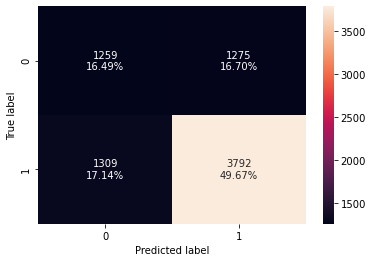

In [59]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

## Observation
- The decision tree is overfitting the training data
- Training metrics are high but the testing metrics are not
- F1_score for the test set is only 75%
- Let's try to improve model performance by hyperparameter tuning

## Decision Tree- Hyperparameter tuning

In [60]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.711599  0.932605   0.719108  0.812059
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.709103  0.929034   0.718248  0.810155


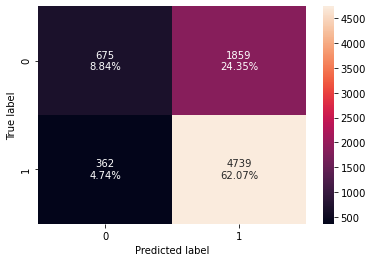

In [61]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

## Observation
- The hyperparameter tuned decision tree is not overfiting the dataset, as well the F1 score has improved
- F1 score for both the train and test datasets are almost 81%

## Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999832  0.999916   0.999832  0.999874
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.676621  0.760047   0.756931  0.758486


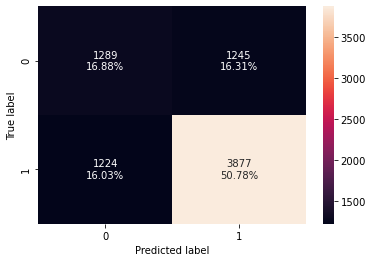

In [62]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

## Observation
- Random forest model is also overfitting in the training data, hence we should do hyperparameter tuning
- There are some parameters of random forest that can be tuned for the model’s better performance which are n_estimators, max_features, max_depth and min_sample_split
- When we  increase "n_estimators", we are adding more trees tending the algorithm not to overfit.The lower this number, the closer the model is to a decision tree, with a restricted feature set
- For "max_features", we will try reducing this number. This defines how many features each tree is randomly assigned. 
- When we input "max_depth"parameter, it will reduce the complexity of the learned models, lowering over fitting risk
- For "min_samples_leaf", we will set the values greater than one. This will have a similar effect to the max_depth parameter, it means the branch will stop splitting once the leaves have that number of samples each

In [63]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt',None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=15, oob_score=True, random_state=1)

Training performance:
    Accuracy   Recall  Precision       F1
0  0.745789  0.77958   0.829637  0.80383
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.724951  0.761419   0.814768  0.787191


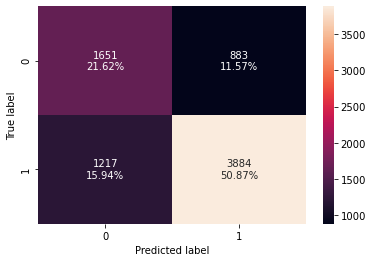

In [64]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

## Observation
- Hyperparameter tuning has decreased the overfit and increased F1 score
- However, this model is not performing as optimally as the hyperparameter tuned decision tree

## Building a Bagging Classifier 

Training performance:
    Accuracy    Recall  Precision        F1
0  0.977824  0.978655   0.988038  0.983324
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.688016  0.757106   0.771628  0.764298


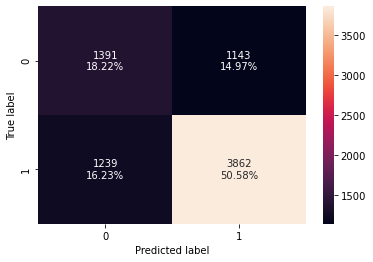

In [65]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

## Observation
- Bagging Classifier is also overfitting in the training dataset and hence we will perform hyperparameter tuning

## Bagging - Hyperparameter Tuning

In [66]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.956041  0.993697   0.943509  0.967953
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728225  0.877475   0.755316  0.811826


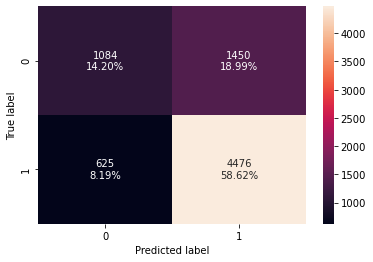

In [67]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

## Observation
- The model is still found to overfit the training data, as the training metrics are high but the testing metrics are not

## Adaboost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738322  0.888151   0.760414  0.819334
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73556  0.877671   0.762432  0.816003


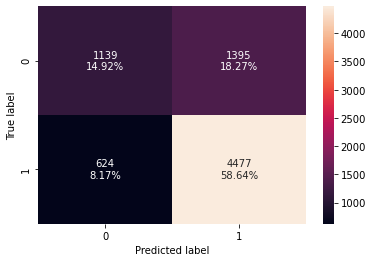

In [68]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

## Observation
- Unlike the decision tree, random forest, or the bagging classifier; the AdaBoost classifier is not found to overfit the training data. It is giving a generalized performance on the training & testing data with a F1 score 0.819 & 0.816
- Lets do the hyperparameter tuning to see if the F1 Score improves further

## Adaboost - Hyperparameter Tuning

In [69]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.74927  0.870252   0.779937  0.822623
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.745514  0.861596   0.780362  0.81897


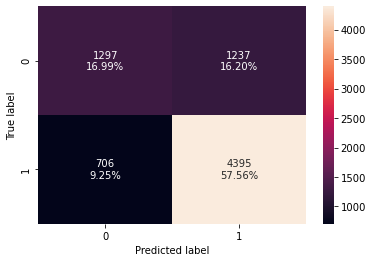

In [70]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

## Observation
- The hyperparameter tuned model is giving similar performance to the default AdaBoost model

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755839  0.875882   0.783979  0.827386
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.748527  0.865517   0.781554  0.821395


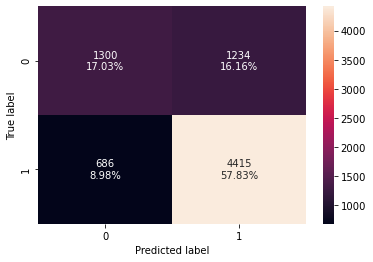

In [71]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

## Observation
- The gradient boosting model is giving generalized performance on both the training and testing data with very high F1 scores of 0.827 and 0.821 respectively. Lets see if the F1 score improves with tuning

## Gradient Boosting - Hyperparameter Tuning

In [72]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754379  0.876134   0.782322  0.826575
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746431  0.865321   0.779446  0.820141


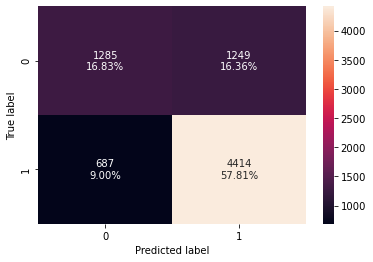

In [73]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

## Observation
- There is not much difference in the model performance after hyperparameter tuning

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision      F1
0  0.809903  0.914706   0.821138  0.8654
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.737525  0.858851   0.773345  0.813858


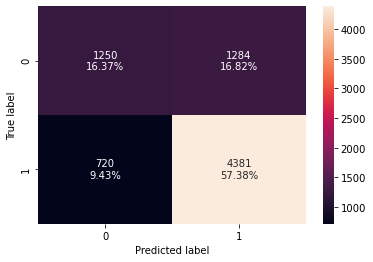

In [74]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

## Observation
- The XGBoost classifier is slightly overfitting the training data. Let's perform the hyperparameter tuning 

## XGBoost - Hyperparameter tuning

In [75]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.745509  0.919916   0.753562  0.828471
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.738179  0.91041   0.750727  0.822894


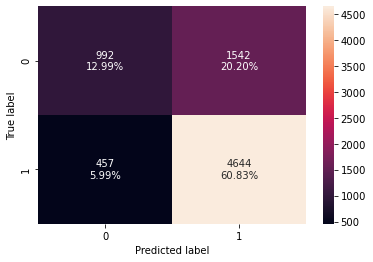

In [76]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

## Observation
- The overfitting has reduced & the model is giving generalized performance on both training & testing data. F1 scores are high with 0.829 and 0.8214 for the training & testing datasets

## Stacking Classifier

In [77]:
estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Ad Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.2,
                                                   n_estimators=60,
                                                   random_state=1)),
                               ('Gradient Boost Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.8)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(c...
                                                 gpu_id=-1,
                                                 importance_type=None,
          

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753312  0.881933    0.77833  0.826899
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.748657  0.872574   0.778147  0.82266


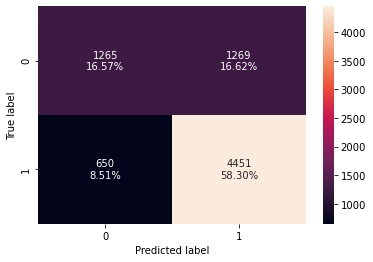

In [78]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

## Observation
- The metrics are similar to what has been observed with other models post hyperparameter tuning. The model is not overfitting & gives generalized performance with training & testing F1 scores of 0.826 & 0.820
- The model is able to identify the majority of cases that should be certified correctlly, but not as many cases that should be denied correctly


##  Will tuning the hyperparameters improve the model performance?
- Given a complex model with many hyperparameters, effective hyperparameter tuning may drastically improve performance
- For example, a XGBoost hypertunning has many different parameters to fine-tune, which slightly improved the model’s performance
- Some models had little or no effect, while others was critical to the model’s viability.

## Model Performance Comparison and Conclusions

In [79]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.711599,0.999832,0.745789,0.977824,0.956041,0.738322,0.749270,0.755839,0.754379,0.809903,0.745509,0.753312
Recall,1.0,0.932605,0.999916,0.779580,0.978655,0.993697,0.888151,0.870252,0.875882,0.876134,0.914706,0.919916,0.881933
Precision,1.0,0.719108,0.999832,0.829637,0.988038,0.943509,0.760414,0.779937,0.783979,0.782322,0.821138,0.753562,0.778330
F1,1.0,0.812059,0.999874,0.803830,0.983324,0.967953,0.819334,0.822623,0.827386,0.826575,0.865400,0.828471,0.826899


In [80]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.661559,0.709103,0.676621,0.724951,0.688016,0.728225,0.735560,0.745514,0.748527,0.746431,0.737525,0.738179,0.748657
Recall,0.743384,0.929034,0.760047,0.761419,0.757106,0.877475,0.877671,0.861596,0.865517,0.865321,0.858851,0.910410,0.872574
Precision,0.748372,0.718248,0.756931,0.814768,0.771628,0.755316,0.762432,0.780362,0.781554,0.779446,0.773345,0.750727,0.778147
F1,0.745869,0.810155,0.758486,0.787191,0.764298,0.811826,0.816003,0.818970,0.821395,0.820141,0.813858,0.822894,0.822660


## Observation
- Decision tree, Random forest (default & tuned), Bagging classifier (default & tuned) & XGBoost were found to overfit the training dataset
- Decision tree tuned, Adaboost (default & tuned), Gradient boost (default & tuned) and XGBoost (tuned) were found to give generalized performance on the training & testing data sets
- Of these, the XGBoost (tuned) has the highest F1 score (although all models have more or less similar performance)

## Feature importance of XGBoost Hyperparameter Tuned Model

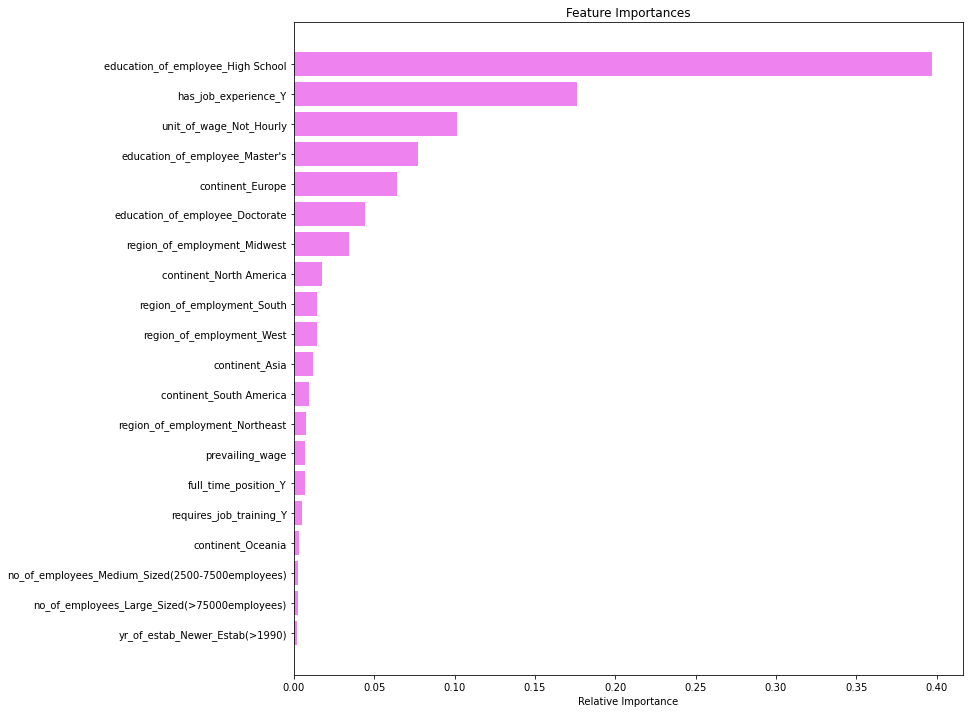

In [81]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Observation
- The findings from the optimized model is similar to what was observed post EDA
- Education of the employee was found to be the most important attribute having an influence on visa certifications. Other important attributes found were - if an employee has prior job experience, unit_of_wage, continent of the employee, & region of employment in the US

## Actionable Insights and Recommendations

- Based on the EDA and the XGBoost(tuned) model, the following features were identified as important for visas getting certified than denied
  - Education of employee ; an employee with only a high school certififcation has over 65% chance of visa getting denied in comparison to an employee with a doctorate degree with over a 85% chance of visa getting certified
  - Unit of wage ; an employee with an hourly pay likewise has over 65% chance of visa getting denied in comparison to an employee with a non-hourly pay (week-ly, month-ly or year-ly) with over 70% chance of visa getting certified
  - The continent the employee is from (e.g., if Europe, over 80% chance of visa getting certified), if the employee has prior job experience (over 75% chance of visa getting approved if an employee has prior work experience but 50% chance of visa getting denied if an employee has no work experience) are other important attributes
  - Likewise, the region of the US the employment opportunity is in is also an important deciding factor with over 70% cases getting certified if the region is Midwest or South
  
- Attributes like if the job opportunity is full time/ part time ; if an employee requires further job training ; the annual prevailing wage of the occupation in the US ; year of establishment of the employer or the number of employees in the organization are not important attributes & do not have much bearing on a case getting certified vs denied
- The XGBoost hyperparameter tuned ML model is able to give generalized prediction on training & testing datasets (not prone to overfitting) and is able to explain over 80% of information (accuracy of 75% on test dataset & F1 score of 82% on test dataset).

- The precision & recall are likewise both high (77% & 88% respectively)

- The confusion matrix is able to identify a higher % of cases getting certified, but only a smaller % of cases getting denied correctly. This limitation has to be borne in mind, and perhaps a reevaluation of cases getting denied can be carried out in case there is a a prevailing human resource shortage in the US 

- The model is still helpful, as only a small subset of data will need further re evaluation significantly decreases time spent in the process